In [1]:
!pip install mediapipe opencv-python


   ---------------------------------------- 0.0/50.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/50.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/50.9 MB 1.1 MB/s eta 0:00:45
   ---------------------------------------- 0.2/50.9 MB 1.4 MB/s eta 0:00:37
   ---------------------------------------- 0.2/50.9 MB 1.5 MB/s eta 0:00:34
   ---------------------------------------- 0.3/50.9 MB 1.6 MB/s eta 0:00:33
   ---------------------------------------- 0.4/50.9 MB 1.6 MB/s eta 0:00:32
   ---------------------------------------- 0.5/50.9 MB 1.7 MB/s eta 0:00:31
   ---------------------------------------- 0.6/50.9 MB 1.7 MB/s eta 0:00:30
    --------------------------------------- 0.7/50.9 MB 1.8 MB/s eta 0:00:29
    --------------------------------------- 0.8/50.9 MB 1.8 MB/s eta 0:00:28
    --------------------------------------- 0.9/50.9 MB 1.9 MB/s eta 0:00:27
    --------------------------------------- 1.0/50.9 MB 1.9 MB/s eta 0:00:27
    ---------

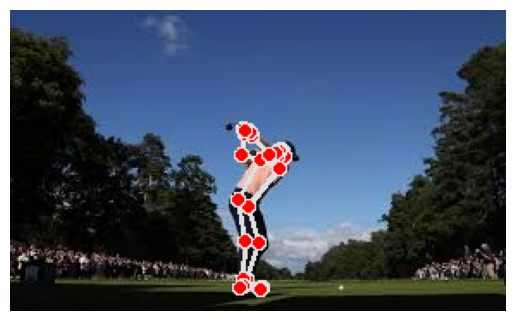

In [25]:
import mediapipe as mp
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize MediaPipe Holistic for multi-person detection
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize MediaPipe drawing utils
mp_drawing = mp.solutions.drawing_utils

# Load image
image = cv2.imread('player_2.jpeg')  # Replace with the actual image path

# Convert the image to RGB (MediaPipe works with RGB images)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image for pose estimation
results = holistic.process(image_rgb)

# Check if any pose landmarks are detected
if results.pose_landmarks:
    # If there are multiple people, results.pose_landmarks will be a list of 'NormalizedLandmarkList' objects
    if isinstance(results.pose_landmarks, list):
        for person_landmarks in results.pose_landmarks:
            # Draw pose landmarks for each detected person
            mp_drawing.draw_landmarks(image, person_landmarks, mp_holistic.POSE_CONNECTIONS)
    else:
        # For single person, directly use the landmarks
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

# Convert the image back to BGR for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with multi-person pose landmarks
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


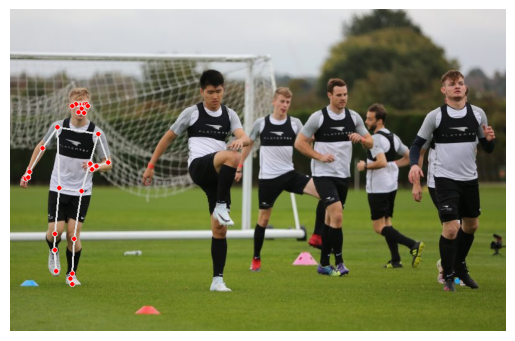

In [24]:
import mediapipe as mp
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(
    min_detection_confidence=0.5,  # Confidence threshold for detection
    min_tracking_confidence=0.5     # Confidence threshold for tracking
)

# Initialize MediaPipe Drawing
mp_drawing = mp.solutions.drawing_utils

# Load image
image = cv2.imread('player.jpeg')  # Replace with the path to your image

# Convert the image to RGB (since MediaPipe expects RGB images)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image to get pose landmarks
results = pose.process(image_rgb)

# Check if pose landmarks are detected
if results.pose_landmarks:
    # Draw landmarks for multiple people (if any)
    if isinstance(results.pose_landmarks, list):  # Check if it's a list for multiple detections
        for person_landmarks in results.pose_landmarks:
            mp_drawing.draw_landmarks(image, person_landmarks, mp_pose.POSE_CONNECTIONS)
    else:  # Only one person detected
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Convert the image back to BGR (OpenCV format for displaying)
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Display the image with landmarks
plt.imshow(image_bgr)
plt.axis('off')
plt.show()


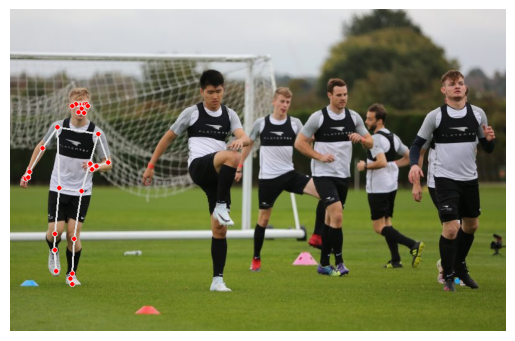

In [1]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Initialize MediaPipe Drawing
mp_drawing = mp.solutions.drawing_utils

# Load the image
image_path = 'player.jpeg'  # Make sure this is the correct path to your image
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # Convert the image to RGB (since MediaPipe expects RGB images)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image to get pose landmarks
    results = pose.process(image_rgb)

    # Check if pose landmarks are detected
    if results.pose_landmarks:
        # Draw landmarks for the first person detected
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Convert the image back to BGR (OpenCV format for displaying)
    image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Display the image with landmarks
    plt.imshow(image_bgr)
    plt.axis('off')
    plt.show()
